# Lab Feedback 02

Here are some suggested solutions for the exercises for this week's practical session. Note that these aren't the only - or indeed necessarily the "best" - solutions.

## Part 1: Pandas Basics

[Pandas](http://pandas.pydata.org/) is a Python library that provided high-level data structures and manipulation tools designed to make data analysis fast and easy in Python.

In these exercises we will merge information from two data sources that share a common key. The first file [passengerData.csv](http://staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week02/passengerData.csv) contains information of 891 passengers on a ship. The second file [ticketPrices.xlsx](http://staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week02/ticketPrices.xlsx) contains a look-up for the ticket prices. The two files share a common column called `TicketType` that can be used to link them.

### 1. Load the data

Firstly, we load the data into Pandas dataframes.

In [3]:
import numpy as np
import pandas as pd

# Load the CSV file into a Pandas dataframe
passengers = pd.read_csv('passengerData.csv')
#print (passenger.head()) # check it's loaded

# Load the Excel file into a Pandas dataframe
ticketPrices = pd.read_excel('ticketPrices.xlsx','Sheet1')
#print (ticketPrices.head()) # check it's loaded

   TicketType  Fare
0           1    33
1           2    56
2           3    77
3           4    22
4           5    14


### 2. Merge on the common column

Merge the two files based on the common `TicketType` column.

In [4]:
merged  = pd.merge(passenger, ticketPrices, on='TicketType')
#print (merged.head())  

### 3. Display oldest passengers' names

In [5]:
# Find the maximum age
maxAge = merged['Age'].max()
# get the names of passengers of the maximum age
oldest_names = merged['Name'][(merged.Age == maxAge)]
# print the values
print (oldest_names.values)

['Barkworth, Mr. Algernon Henry Wilson']


### 4. Scatterplot

Plot the data on a scatter plot of age vs ticket prices

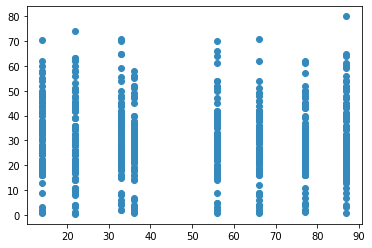

In [7]:
import matplotlib.pyplot as plt

plt.scatter(merged.Fare, merged.Age, c = '#348abd')


### 5. Filter dots

Plot only the data that shows female passengers aged 40 to 50 and who paid more than or equal to 40.

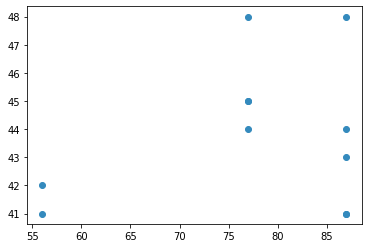

In [8]:
# filter out the passenger that don't meet the criteria
subset = merged[((merged.Age > 40) & (merged.Age < 50) & (merged.Fare >= 40) & (merged.Sex == "female"))]
plt.scatter(subset.Fare, subset.Age, c = '#348abd')

## Part 2: Missing values

Pandas has a wide range of possible functions that will help you to deal with missing data and cure them using a number of options. The online pandas page is a good resource to look at these functions and see what's available. pandas uses the floating point value `NaN` (Not a Number) to represent missing data in both floating as well as in non-floating point arrays.

For the exercises here, we use a modified version of data from a [Kaggle competition](https://www.kaggle.com/). Kaggle is a platform for predictive modelling and analytics competitions on which companies and researchers post their data and statisticians and data miners from all over the world compete to produce the best models. The [original data and description is here](https://www.kaggle.com/c/titanic-gettingStarted) but for our exercise most of the information here is a bit out of scope.

### 1. Load data

Load the slightly modified [Titanic survival data](http://staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week02/titanicSurvival_m.csv) into a pandas data frame.

In [9]:
# Load the CSV file into a Pandas dataframe
titanicDF = pd.read_csv('titanicSurvival_m.csv')

### 2. Missing value counts

Find the counts of missing values in each column.

Dataframe's `shape` gives us a 2D array the dataframe, the first component of which is the number of rows and the second component of which is the number of columns. So `titanicDF.shape[0]` gives us the number of rows.

`titanicDF.count()` gives us the number of non-missing values for each column.

Subtracting this from the total number of rows gives us the number of missing values.

In [10]:
print (titanicDF.shape[0] - titanicDF.count())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64


We see that the `Age`, `Fare`, and `Cabin` columns are problematic. It is not really possible to replace values in the Cabin column since it is not something we can estimate, we can fill in the values for the others. However, we need to be careful about claims we make regarding the Age column since about 20% of the data values are missing.

### 3. Compute some descriptive statistics

We calculate some candidate statistics that could be used for replacement.

We can use DataFrame's `describe` function to compute summary statistics, or we can use Series' functions `count()`, `mean()`, `max()`, etc. 

In [11]:
# Display summary statistics
stats=titanicDF.describe()
print(stats)

print()
#extract and print the mean of the age from this stats dataframe
print("The mean of the age from the stats dataframe is ",stats['Age']['mean'])

#calculate and print the mean of the age using Series' mean() function
print("The mean of the age from Series' mean function is ",titanicDF['Age'].mean())
print ("Hopefully they are the same!")

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  845.000000  
mean     0.381594   32.304319  
std      0.806057   49.792612  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.275000  
max      6.000000  512.329200  

The mean of the age from the stats dataframe is  29.69911764705882
The mean of t

### 4 & 5. Replace missing values with zeros & means, and show in scatterplot

I'm storing these imputed columns as Series objects. Series' `fillna()` function replaces all `NaN` values with whichever value we supply.

Additionally, I'm producing a new column (`atLeastOneNaN`) that contains `True` if either value is imputed. This will be used to identify the imputed points on the scatterplot. I'm using hexadecimal to specify the colours (pairs of hex values represent red, green, blue and transparancy) in a dictionary. Transparancy helps indicate where points overlap. `colours` is a new column that allocates a colour for each point.

I then make a grid (1 row, 2 columns) of subplots for two side-by-side scatterplots, one for each imputation method.

Text(0.5, 1.0, 'Imputed with the mean')

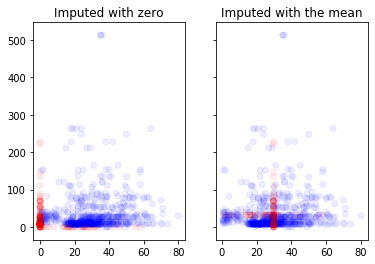

In [13]:
ageWithZero = titanicDF['Age'].fillna(0)
fareWithZero = titanicDF['Fare'].fillna(0)


ageWithMean = titanicDF['Age'].fillna(stats['Age']['mean'])
fareWithMean = titanicDF['Fare'].fillna(titanicDF['Fare'].mean())

# This optional step will identify rows where at least one of the values is NaN with True
atLeastOneNaN = titanicDF['Age'].isnull() | titanicDF['Fare'].isnull()

# Here, I'm specifying red for imputed values and blue for the others.
colourPalette = {True: '#ff000011', False: '#0000ff11'}
#Then I'm putting the colours in the corresponding rows of a new column
colours = atLeastOneNaN.map(colourPalette)

#New I'm making a grid (1 row, 2 columns) of subplots, which share a y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# In the first, I'm plotting the zero-imputed values
ax1.scatter(ageWithZero, fareWithZero, c=colours)
ax1.set_title('Imputed with zero')
# Then, I'm plotting the mean-imputed values
ax2.scatter(ageWithMean, fareWithMean, c=colours)
ax2.set_title('Imputed with the mean')

### 6. Reflect on the differences

To be honest, this isn't the best data to demonstrate different imputation methods. For example, zero is clearly a bad impuation choice!

(Not surprisingly), the mean-replacements seem to work better - they seem to fitting better to the other data points. It might also be worth checking the variety in the values. If high, the mean-replacement might flatten the data, artifically reducing the variance. Also note that as the mean includes the outlier values (see point with exceptionally high values in y) it might be too high. So you might prefer to use a robust measure, such as median.

## Part 3: Data Transformations

Data transformations enable us to transform data in ways that would make them suitable for the kinds of the analysis we aim to accomplish and enable us to mitigate the effects of particular irregularities/characteristics in the data. In the following, we have a set of exercises that requires you to apply a data transformation and observe its effects on the data.


### 1. Load data

Download the [CSV file from WHO on Tuberculosis](http://staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week02/TB_burden_countries_2014-09-29.csv). Information on the data can be found on WHO's web page.

In [5]:
import pandas as pd

tbDF= pd.read_csv('TB_burden_countries.csv')

### 2. Replace missing values

You may need to replace missing values before you start.

In [6]:
# get a single column and fill NaNs with the mean
tbDFCol = tbDF.e_prev_100k_hi.fillna(tbDF.e_prev_100k_hi.mean())

### 3. Look at the distributions with a histogram

Study the distributions of variables to determine whether it might be worth transforming them

(array([2.523e+03, 7.080e+02, 4.590e+02, 3.120e+02, 2.480e+02, 2.040e+02,
        1.410e+02, 8.900e+01, 6.200e+01, 2.900e+01, 2.600e+01, 2.500e+01,
        2.100e+01, 1.700e+01, 1.000e+01, 8.000e+00, 7.000e+00, 9.000e+00,
        2.000e+00, 3.000e+00]),
 array([5.400000e-01, 1.787630e+02, 3.569860e+02, 5.352090e+02,
        7.134320e+02, 8.916550e+02, 1.069878e+03, 1.248101e+03,
        1.426324e+03, 1.604547e+03, 1.782770e+03, 1.960993e+03,
        2.139216e+03, 2.317439e+03, 2.495662e+03, 2.673885e+03,
        2.852108e+03, 3.030331e+03, 3.208554e+03, 3.386777e+03,
        3.565000e+03]),
 <a list of 20 Patch objects>)

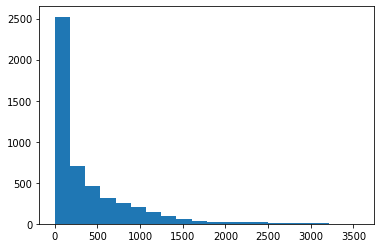

In [7]:
import matplotlib.pyplot as plt

# Makes a histogram with 20 bins
plt.hist(tbDFCol, 20)

You can plot histograms for every variable, to make it easier.

The `plt.subplots` function will create a set of subplots in rows and columns. I've chosen 5 columns and divide the number of variables by 5 to get the columns. `//` is integer division (as we can only have a round number of rows) and we add one to get the last incomplete row. The The `subplots` function returns a `Figure` object (that we ignore) and a 2D array of subplots (axis) corresponding to rows and columns. We iterate through these and use `tbNumericDF.columns[i]` to access the columns names with a numerical index `i` which we add one to at each iteration.

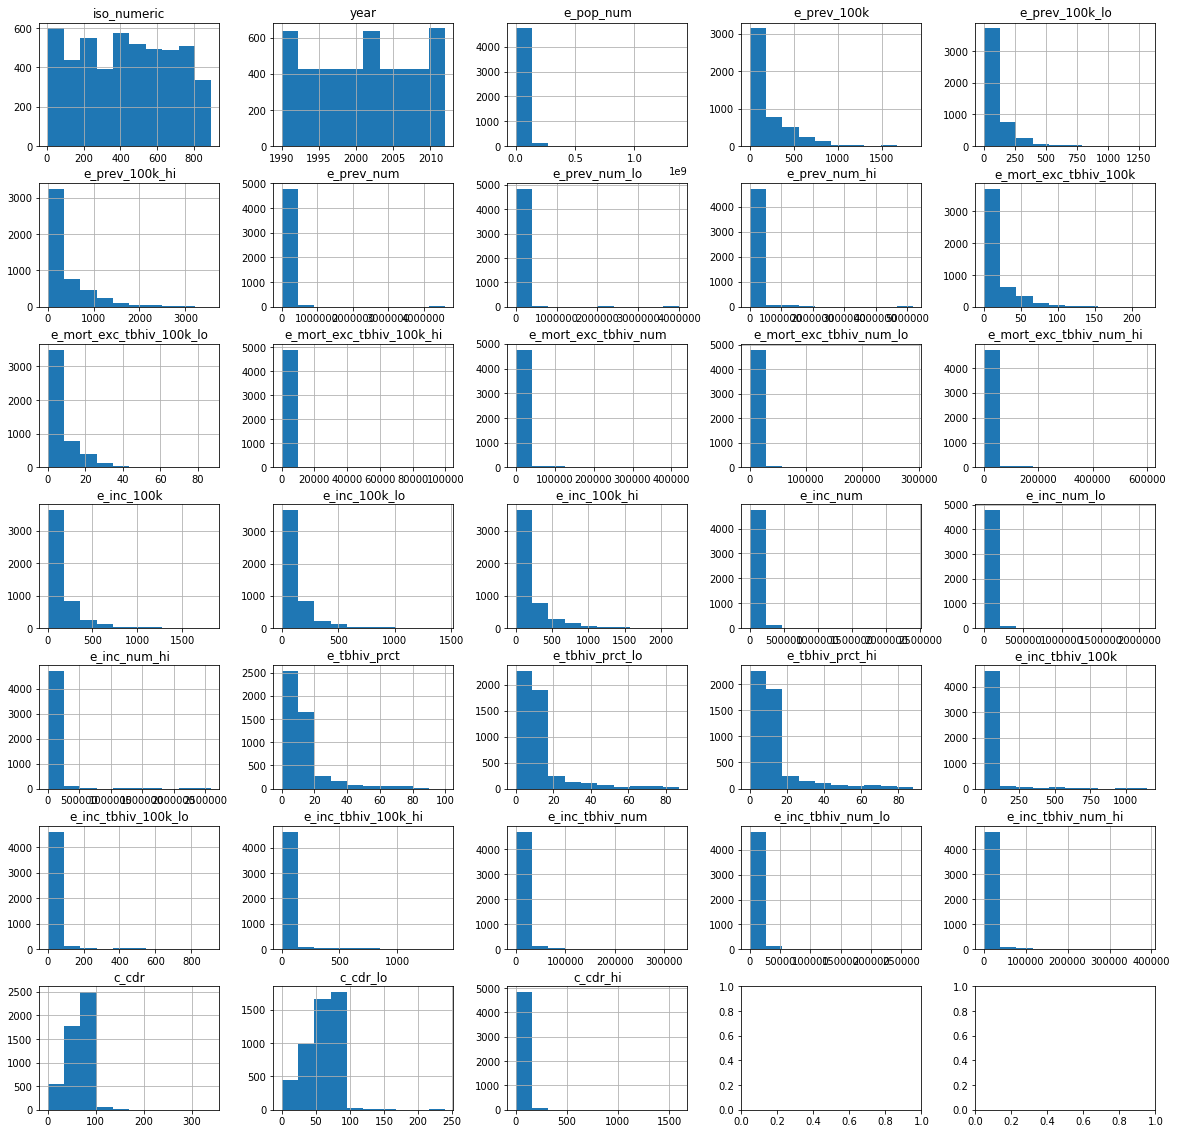

In [42]:
# This will select all the numeric columns
tbNumericDF=tbDF.select_dtypes(include='number')

# Get the number of columns
numCols=tbNumericDF.shape[1]

#
fig, axisRows = plt.subplots(numCols//5+1, 5, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            tbNumericDF.hist(column = tbNumericDF.columns[i], bins = 10, ax=axis)
            i = i+1



### 4. Try log-transforming and compare with the original

Can you make the variable more normally distribut

Text(0.5, 1.0, 'Log normalisation')

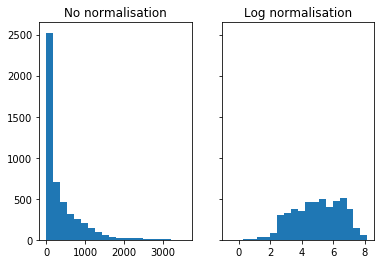

In [8]:
import numpy as np

# normalize it using the apply function
normalisedCol = tbDFCol.apply(np.log)

# before / after normalisation
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.hist(tbDFCol, 20)
ax1.set_title('No normalisation')
ax2.hist(normalisedCol, 20)
ax2.set_title('Log normalisation')

It now seems to be more normally distributed.

### 5. Normalise numerical columns

To put all the numerical columns on comparable ranges, we can range normalise or compute z-scores (however, z-scores will assume the data are normally distributed).

In [9]:
# Before we proceed fill all missing values on numeric columns
# (The mean() method on the dataframe will use the respective average column)
tbDF = tbDF.fillna(tbDF.mean())

# This will select all the numeric columns
tbNumericDF=tbDF.select_dtypes(include='number')

# This will range normalise each
tbNumericDFRangeNormalised=(tbNumericDF-tbNumericDF.min())/(tbNumericDF.max()-tbNumericDF.min())
print(tbNumericDFRangeNormalised.head())

# This will convert to z-scores
tbNumericDFzScoreNormalised=(tbNumericDF-tbNumericDF.mean())/tbNumericDF.std()
print(tbNumericDFzScoreNormalised.head())

   iso_numeric      year  e_pop_num  e_prev_100k  e_prev_100k_lo  \
0          0.0  0.000000   0.008518     0.175691        0.085051   
1          0.0  0.045455   0.009158     0.192898        0.130646   
2          0.0  0.090909   0.010029     0.207954        0.128366   
3          0.0  0.136364   0.011019     0.221397        0.141285   
4          0.0  0.181818   0.011970     0.231613        0.151164   

   e_prev_100k_hi  e_prev_num  e_prev_num_lo  e_prev_num_hi  \
0        0.183607    0.008261        0.00325       0.014808   
1        0.171824    0.009783        0.00550       0.014808   
2        0.194268    0.011522        0.00575       0.018462   
3        0.202965    0.013478        0.00700       0.021154   
4        0.210540    0.015435        0.00825       0.023077   

   e_mort_exc_tbhiv_100k  ...  e_tbhiv_prct_hi  e_inc_tbhiv_100k  \
0               0.140271  ...         0.131186          0.000304   
1               0.158371  ...         0.131186          0.000313   
2       

One reason for normalising is to make values "dimensionless", so they can be more easily compared even when the magnitudes are different. Of course, this only works if magnitude is not important for the current analysis tasks